# TF-IDF

In [28]:
import nltk
import numpy as np

In [12]:
my_sentence = "Is India really ahead of the West in terms of reproductive rights? Contrary to the grandstanding since the overturning of the landmark Roe V. Wade judgment, the truth is, no. Bodily autonomy and reproductive rights must be viewed from three lenses — legal, medical, and social. Only when women and non-binary pregnant people enjoy absolute autonomy over their own bodies by these parameters, can one claim that India is showing the way to the West.First, the legal standpoint: The Medical Termination of Pregnancy (Amendment) Act 2021 is far from ideal and has been criticised for not taking a rights-based approach. It doesn’t give the pregnant person complete autonomy in ending the pregnancy, instead making them go through various systemic barriers. Additionally, it uses the word “woman”, thereby leaving out pregnant transgender and non-binary persons who are biologically capable of bearing children. It forces them to identify themselves in the gender-binary ignoring their gender identity.According to the Act, a pregnancy can be terminated on the following conditions: Grave danger to the physical/mental health of the pregnant woman; foetal abnormalities; rape/coercion; and contraceptive failure. A woman’s right to choose to end the pregnancy even in the first few weeks is still not recognised in India. In fact, the final decision falls not on the pregnant person, but on registered medical practitioners (RMP). Depending on the gestational period, one/two RMPs or a medical board decide “in good faith” that the pregnancy can be terminated. The constitution of a medical board, a requirement by the Act, is considered a barrier by the World Health Organisation. It stands no reason that a medical board, insulated from any impact of pregnancy, should be able to veto a person’s right to access abortion.There is a sense of déjà vu about the developments in Maharashtra. In state after state, it’s the same script. In Madhya Pradesh and Karnataka, we saw the removal of non-BJP governments due to defections and splits. In Maharashtra, this happened to the Shiv Sena instead of the Congress but the script was more or less the same. India’s parliamentary democracy has seen it all — defections, splits, controversies surrounding the role of presiding officers, judicial interventions and even videography of proceedings of the House. Right from the beginning of the current crisis, however, it was clear that Uddhav Thackeray had lost the majority and this had happened because of the desertion of his own party’s MLAs."

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [4]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()

In [13]:
sentence = nltk.sent_tokenize(my_sentence)
print(sentence)

['Is India really ahead of the West in terms of reproductive rights?', 'Contrary to the grandstanding since the overturning of the landmark Roe V. Wade judgment, the truth is, no.', 'Bodily autonomy and reproductive rights must be viewed from three lenses — legal, medical, and social.', 'Only when women and non-binary pregnant people enjoy absolute autonomy over their own bodies by these parameters, can one claim that India is showing the way to the West.First, the legal standpoint: The Medical Termination of Pregnancy (Amendment) Act 2021 is far from ideal and has been criticised for not taking a rights-based approach.', 'It doesn’t give the pregnant person complete autonomy in ending the pregnancy, instead making them go through various systemic barriers.', 'Additionally, it uses the word “woman”, thereby leaving out pregnant transgender and non-binary persons who are biologically capable of bearing children.', 'It forces them to identify themselves in the gender-binary ignoring thei

In [16]:
corpus = []
for i in range(len(sentence)):
    review = re.sub('[^a-zA-Z]', ' ', sentence[i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = " ".join(review)
    corpus.append(review)

In [17]:
corpus

['india really ahead west term reproductive right',
 'contrary grandstanding since overturning landmark roe v wade judgment truth',
 'bodily autonomy reproductive right must viewed three lens legal medical social',
 'woman non binary pregnant people enjoy absolute autonomy body parameter one claim india showing way west first legal standpoint medical termination pregnancy amendment act far ideal criticised taking right based approach',
 'give pregnant person complete autonomy ending pregnancy instead making go various systemic barrier',
 'additionally us word woman thereby leaving pregnant transgender non binary person biologically capable bearing child',
 'force identify gender binary ignoring gender identity according act pregnancy terminated following condition grave danger physical mental health pregnant woman foetal abnormality rape coercion contraceptive failure',
 'woman right choose end pregnancy even first week still recognised india',
 'fact final decision fall pregnant perso

# Difference between Stemming and Lemmatization
- Note - stemming is not in Spacy. Only Lemmatization is available in spacy
- stemming available in nltk.stem
- stemming - Porter/ Snowball - word may/ maynot exist in dictionary - meaning of the word may/ may not be proper- fast
- Lemmatization - root meaning is retained- slow

In [18]:
from nltk.stem import PorterStemmer
p_stemmer = PorterStemmer()

In [19]:
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language = 'english')

In [20]:
words = ['easily','run', 'play', 'playing', 'runner', 'fairly']

In [21]:
for word in words:
    print( word + '-----' + p_stemmer.stem(word))

easily-----easili
run-----run
play-----play
playing-----play
runner-----runner
fairly-----fairli


In [22]:
for word in words:
    print( word + '-----' + s_stemmer.stem(word))

easily-----easili
run-----run
play-----play
playing-----play
runner-----runner
fairly-----fair


In [23]:
for word in words:
    print( word + '-----' + wordnet.lemmatize(word))

easily-----easily
run-----run
play-----play
playing-----playing
runner-----runner
fairly-----fairly


# Build TF-IDF Model

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer()
my_word = tfidf_model.fit_transform(corpus).toarray()
my_word

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
my_word[0]
# Notice its not only 0 and 1 values as was in Bag of Words. TF-IDF gives the different values as per feature importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.43018327, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Spam Message Classificaton Problem

In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [39]:
df = pd.read_csv('spam.tsv', sep = '\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


# Checking Missing Values

In [16]:
df.isnull().sum()  # No Missing data

label      0
message    0
length     0
punct      0
dtype: int64

In [17]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [19]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
# No Feature scaling required
# No outlier check and treatment required

In [40]:
# check imbalance dataset- Data is imbalanced
df.label.value_counts()/len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [41]:
# Creating dataframe as per labels ham and spam
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [42]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [43]:
# Need to balance dataset- taking out sample of ham- based on spam data shape
ham = ham.sample(spam.shape[0])

In [44]:
# appending spam data to ham to create data
data = ham.append(spam, ignore_index = True)
data.shape

(1494, 4)

In [45]:
data.label.value_counts()

spam    747
ham     747
Name: label, dtype: int64

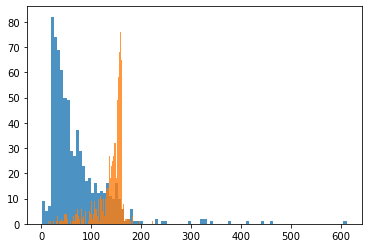

In [46]:
# vizulaization using ham and spam
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha = 0.8)
plt.hist(data[data['label']=='spam']['length'], bins = 100, alpha = 0.8)
plt.show()


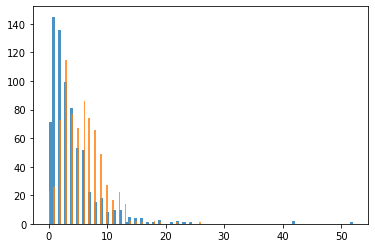

In [27]:
# # vizulaization using ham and spam
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.8)
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha = 0.8)
plt.show()

In [47]:
# Split the data into train and test 
from sklearn.model_selection import train_test_split


In [48]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], random_state = 101, test_size = .30)

In [49]:
data.shape

(1494, 4)

In [50]:
x_test.shape

(449,)

In [51]:
x_train.shape

(1045,)

# Build Classification Model

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfid_model = TfidfVectorizer()
# Machine Learning Algorthim
from sklearn.ensemble import RandomForestClassifier
# pipeline package to apply and merge NLP and ML together to get the output
from sklearn.pipeline import Pipeline

In [53]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', RandomForestClassifier(n_estimators=200))])

In [54]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=200))])

In [55]:
y_predict = classifier.predict(x_test)

In [56]:
y_test, y_predict

(416      ham
 497      ham
 774     spam
 142      ham
 864     spam
         ... 
 1228    spam
 100      ham
 601      ham
 545      ham
 268      ham
 Name: label, Length: 449, dtype: object,
 array(['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham',
        'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham',
        'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham',
        'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
        'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam',
        'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam',
        'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'ham', 'spam', 'spam', 'spam', 'spam', '

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [58]:
print(confusion_matrix(y_test, y_predict))

[[226   0]
 [ 24 199]]


In [59]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       226
        spam       1.00      0.89      0.94       223

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [60]:
print(accuracy_score(y_test, y_predict))

0.9465478841870824


In [61]:
y_train_predict = classifier.predict(x_train)

In [62]:
print(confusion_matrix(y_train, y_train_predict))

[[521   0]
 [  0 524]]


In [63]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       521
        spam       1.00      1.00      1.00       524

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045



# Support Vector machine

In [64]:
from sklearn.svm import SVC

In [65]:
SVC()

SVC()

In [72]:
classifier_1 = Pipeline([('tfidf', TfidfVectorizer()), ('svc', SVC( C= 100, gamma = 'auto'))])

In [73]:
classifier_1.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svc', SVC(C=100, gamma='auto'))])

In [74]:
y_predict_svc = classifier_1.predict(x_test)

In [75]:
print(accuracy_score(y_test, y_predict_svc))

0.9131403118040089


In [76]:
print(confusion_matrix(y_test, y_predict_svc))

[[224   2]
 [ 37 186]]


In [77]:
print(classification_report(y_test, y_predict_svc))

              precision    recall  f1-score   support

         ham       0.86      0.99      0.92       226
        spam       0.99      0.83      0.91       223

    accuracy                           0.91       449
   macro avg       0.92      0.91      0.91       449
weighted avg       0.92      0.91      0.91       449



# Naive Baye's Classifier

In [92]:
from sklearn.naive_bayes import MultinomialNB 

In [95]:
MultinomialNB()

MultinomialNB()

In [96]:
classifier_2 = Pipeline([('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [99]:
classifier_2.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [100]:
y_predict_nb = classifier_1.predict(x_test)

In [101]:
print(accuracy_score(y_test, y_predict_nb))

0.9131403118040089


In [102]:
print(confusion_matrix(y_test, y_predict_nb))

[[224   2]
 [ 37 186]]


In [103]:
print(classification_report(y_test, y_predict_nb))

              precision    recall  f1-score   support

         ham       0.86      0.99      0.92       226
        spam       0.99      0.83      0.91       223

    accuracy                           0.91       449
   macro avg       0.92      0.91      0.91       449
weighted avg       0.92      0.91      0.91       449



# Conclusion
- Random Forest shows highest accuracy of 95% . This is preferred Model